# Lectura y visualización de ERA5

## Importat librerias **`xarray`**

In [1]:
import xarray as xr

## Leer datos

In [2]:
ds = xr.open_dataset('../../data/test/era5_2015.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 89, time: 12)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2015-12-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-28 20:06:43 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Usando **`xarray`** podemos visualizar nuestros datos más estructurados. Veamos la estructura de nuestros datos. Este se conforma por coordenadas, variables y atributos.

In [8]:
ds.t2m.head()

<xarray.DataArray 't2m' (time: 5, latitude: 5, longitude: 5)>
array([[[298.593  , 298.58517, 298.59497, 298.59497, 298.58713],
        [298.46765, 298.4696 , 298.47354, 298.47354, 298.4696 ],
        [298.3369 , 298.32712, 298.33105, 298.3369 , 298.3369 ],
        [298.20227, 298.21402, 298.22186, 298.21207, 298.20813],
        [298.09064, 298.08084, 298.06174, 298.05588, 298.0769 ]],

       [[299.1311 , 299.08655, 299.04935, 299.01996, 298.99646],
        [298.98276, 298.93036, 298.8912 , 298.85986, 298.83438],
        [298.84222, 298.76633, 298.72324, 298.69583, 298.6684 ],
        [298.70758, 298.65665, 298.61945, 298.57294, 298.53375],
        [298.6214 , 298.5553 , 298.4848 , 298.43192, 298.403  ]],

       [[299.55075, 299.46896, 299.41217, 299.34753, 299.29712],
        [299.43567, 299.36908, 299.3123 , 299.2638 , 299.21484],
        [299.35144, 299.26773, 299.2168 , 299.1737 , 299.1463 ],
        [299.2599 , 299.2266 , 299.19135, 299.1541 , 299.12524],
        [299.19525, 299.1698 , 299.1365 , 299.10956, 299.088  ]],

       [[299.9865 , 299.95517, 299.94342, 299.93756, 299.93167],
        [299.96106, 299.9493 , 299.92972, 299.92386, 299.91797],
        [299.91797, 299.89447, 299.90033, 299.9023 , 299.89056],
        [299.85333, 299.86703, 299.87878, 299.87488, 299.86118],
        [299.80093, 299.81268, 299.81662, 299.81467, 299.80878]],

       [[299.75443, 299.73532, 299.7275 , 299.71378, 299.70792],
        [299.72946, 299.71576, 299.70007, 299.68637, 299.68442],
        [299.71576, 299.68048, 299.66873, 299.66287, 299.64523],
        [299.68048, 299.67072, 299.66287, 299.64133, 299.61978],
        [299.66873, 299.64523, 299.60608, 299.58258, 299.5669 ]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 -84.25 -84.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 1.0
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2015-05-01
Attributes:
    units:      K
    long_name:  2 metre temperature

Ahora vamos a hacer una figura usando la función **`plot`** dentro de **`xarray`**.

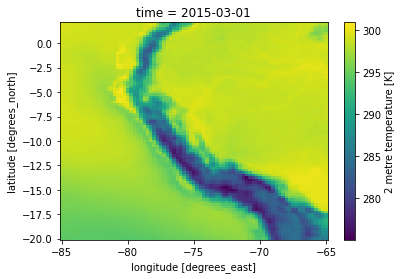

In [11]:
# Vamos a seleccionar el tiempo 1 y conservar las lons y lats.
ds['t2m'][2].plot()

### Vamos importar algunas funciones de **`cartopy`**

In [12]:
from cartopy.io.shapereader import Reader as ShapeReader
from cartopy.crs import PlateCarree

Vamos a definir una proyección para usarlo luego.

In [13]:
projection = PlateCarree()

###  Importamos **`numpy`** para hacer algunas operaciones

In [14]:
import numpy as np

Por ejemplo convertimos la temperatura de **°K** para **°C**. Además, creamos como matrices la latitud y longitud. 

In [15]:
T = ds['t2m'][0]-273.16
U = ds['u10'][0]
V = ds['v10'][0]

lat = ds['latitude']
lon = ds['longitude']
lon, lat = np.meshgrid(lon, lat)


In [16]:
lon

array([[-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       ...,
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ],
       [-85.  , -84.75, -84.5 , ..., -65.5 , -65.25, -65.  ]],
      dtype=float32)

In [17]:
lat

array([[  2.  ,   2.  ,   2.  , ...,   2.  ,   2.  ,   2.  ],
       [  1.75,   1.75,   1.75, ...,   1.75,   1.75,   1.75],
       [  1.5 ,   1.5 ,   1.5 , ...,   1.5 ,   1.5 ,   1.5 ],
       ...,
       [-19.5 , -19.5 , -19.5 , ..., -19.5 , -19.5 , -19.5 ],
       [-19.75, -19.75, -19.75, ..., -19.75, -19.75, -19.75],
       [-20.  , -20.  , -20.  , ..., -20.  , -20.  , -20.  ]],
      dtype=float32)

### Importamos **`matplotlib`**

In [18]:
from matplotlib import pyplot as plt

Podemos ver los valores mínimo y máximo de la temperatura.

In [19]:
print(T.values.min())
print(T.values.max())

1.0067749
27.245148


### Importamos **`cmaps`** y **`geocat.viz`**

In [20]:
import cmaps
import geocat.viz as gv

In [21]:
# Definir los niveles de contorno
clevs = np.linspace(T.values.min()-0.5, T.values.max()+0.5, 12, dtype=float).round()

# Importando la base del colormap para trabajar
newcmp = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                              minval=0.1,
                              maxval=0.6,
                              n=len(clevs))


### Ahora vamos a crear nuestro figura

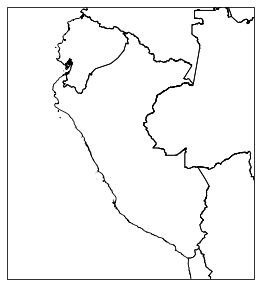

In [22]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile 
fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


### Agregamos la temperatura

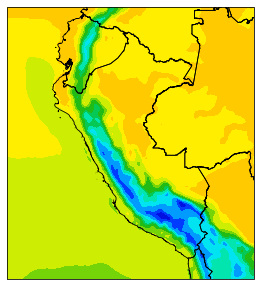

In [23]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile 
fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)

# Ahora agregamos el campo de la temperatura
cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

### Ahora agregamos la paleta de colores

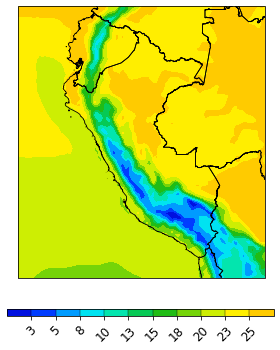

In [24]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile 
fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)

# Ahora agregamos el campo de la temperatura
cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cax = plt.axes((0.14, 0.02, 0.74, 0.02))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')
cbar.ax.tick_params(labelsize=12, rotation=45)


### Vamos agregar los campos de viento

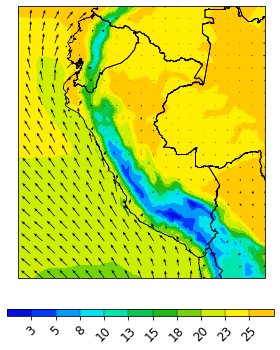

In [27]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cax = plt.axes((0.14, 0.02, 0.74, 0.02))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')
cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos los vectores del viento con quiver

dim_grid = 4
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='black',
              width=.003,
              scale=120.,
              headwidth=3.75,
              zorder=4)


### Ahora agregaremos alguna información del viento

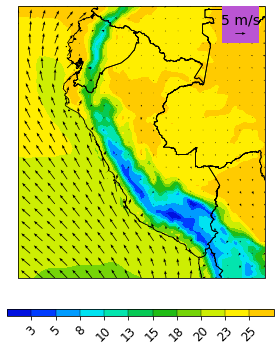

In [30]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cax = plt.axes((0.14, 0.02, 0.74, 0.02))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')
cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos los vectores del viento con quiver

dim_grid = 4
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='black',
              width=.003,
              scale=120.,
              headwidth=3.75,
              zorder=4)

# Dibujo del cuadro del vector de velocidad de referencia
rect = plt.Rectangle((-68.5, -1),
                     3,
                     3,
                     facecolor='mediumorchid',
                     edgecolor=None,
                     zorder=4)
ax.add_patch(rect)

ax.quiverkey(Q,
             0.9,
             0.9,
             5,
             '5 m/s',
             labelpos='N',
             color='black',
             coordinates='axes',
             fontproperties={'size': 14},
             labelsep=0.1)


### Ahora agregaremos las etiquetas de la lat y lon. Además guardamos nuestra figura.

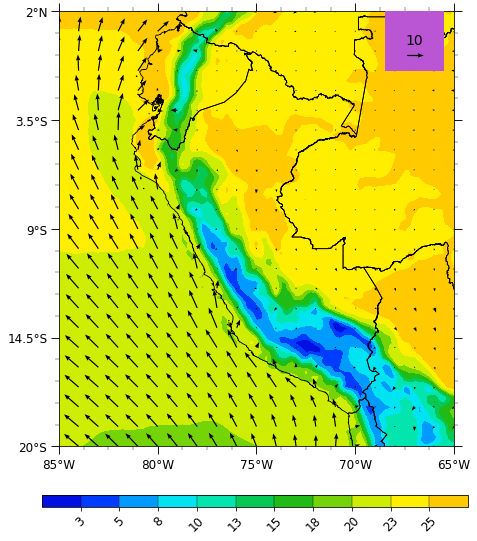

In [32]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cax = plt.axes((0.14, 0.02, 0.74, 0.02))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')
cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos los vectores del viento con quiver

dim_grid = 4
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='black',
              width=.003,
              scale=120.,
              headwidth=3.75,
              zorder=4)

# Dibujo del cuadro del vector de velocidad de referencia
rect = plt.Rectangle((-68.5, -1),
                     3,
                     3,
                     facecolor='mediumorchid',
                     edgecolor=None,
                     zorder=4)
ax.add_patch(rect)

ax.quiverkey(Q,
             0.9,
             0.9,
             5,
             '10',
             labelpos='N',
             color='black',
             coordinates='axes',
             fontproperties={'size': 14},
             labelsep=0.1)

# definimos las caracteristicas de los "ticks"
gv.set_axes_limits_and_ticks(ax,
                             xticks=np.linspace(lon.min(), lon.max(), 5),
                             yticks=np.linspace(lat.min(), lat.max(), 5))

# Adicion de las latitudes y longitudes correspondientes
gv.add_lat_lon_ticklabels(ax)

# configuración de los "ticks" mayores y menores
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=5,
                         labelsize=12)

fig.savefig('fig/Temp_202101.png', dpi = 300, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)

## Retornar al [indice](./../indice.md)